MNIST-GAN
GAN의 학습 목적은 "어떻게 하면 모델을 잘 학습시켜서 생성기가 내보내는 Pg가 실제 데이터 분포인 Pd를 근사하여 궁극적으로 같은 분포를 갖도록 할 것인가?" 라고들 하시는데 실제 학습을 통해 알아보겠습니다.

https://github.com/golbin/TensorFlow-Tutorials/blob/master/07%20-%20GAN/02%20-%20GAN2.py
의 코드를 사용해 학습하였습니다.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./MNIST/data/", one_hot=True)

Extracting ./MNIST/data/train-images-idx3-ubyte.gz
Extracting ./MNIST/data/train-labels-idx1-ubyte.gz
Extracting ./MNIST/data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST/data/t10k-labels-idx1-ubyte.gz


Hyper parameter 설정

In [3]:
total_epoch = 100
batch_size = 100
n_hidden = 256
n_input = 28 * 28
n_noise = 128
n_class = 10

Placeholder 구성

In [4]:
X = tf.placeholder(tf.float32, [None, n_input])
# Y는 노이즈와 실제 이미지에 그에 해당하는 숫자 정보를 넣어주기 위하여 사용한다.
Y = tf.placeholder(tf.float32, [None, n_class])
# Z는 노이즈로서 생성기에 들어간다.
Z = tf.placeholder(tf.float32, [None, n_noise])

Generator

In [5]:
def Generator(noise, labels):
    with tf.variable_scope('Generator'):
        # noise값에 labels 정보를 추가한다.
        inputs = tf.concat([noise, labels], 1)
        
        # Tensorflow에서는 다양한 유틸리티 함수를 제공해준다.
        hidden = tf.layers.dense(inputs, n_hidden, activation=tf.nn.relu)
        output = tf.layers.dense(hidden, n_input, activation=tf.nn.sigmoid)
    return output
        

Discriminator

In [6]:
# reuse flag를 사용한다면 변수의 재사용이 깔끔하게 된다.
def Discriminator(inputs, labels, reuse=None):
    with tf.variable_scope('Discriminator') as scope:
        if reuse:
            scope.reuse_variables()
        
        inputs = tf.concat([inputs, labels], 1)
        hidden = tf.layers.dense(inputs, n_hidden, activation=tf.nn.relu)
        # activation이 none이라면 linear activation을 유지한다.
        output = tf.layers.dense(hidden, 1, activation=None)
    return output

In [7]:
def get_noise(batch_size, n_noise):
    return np.random.uniform(-1., 1., size=[batch_size, n_noise])

생성 모델과 판별 모델에 labels 정보를 추가하여 
labels 정보에 해당하는 이미지를 생성할 수 있도록 유도한다.

In [8]:
G = Generator(Z, Y)
D_real = Discriminator(X, Y)
D_gene = Discriminator(G, Y, True)

손실함수의 경우 진짜 이미지를 판별하는 D_real의 값은 1에 가깝도록, 가짜 이미지를 판별하는 D_gene의 값은 0에 가깝도록 구현.

In [9]:
loss_D_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_real,
                                                                     labels=tf.ones_like(D_real)))
loss_D_gene = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_gene,
                                                                    labels=tf.zeros_like(D_gene)))
# loss_D_real 과 loss_D_gene 값을 더한 뒤, 이 값을 최소화
loss_D = loss_D_real + loss_D_gene

# 가짜 이미지를 진짜에 가깝도록 만드려면 D_gene 값이 1에 최대한 가까워져야 한다.
loss_G = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_gene,
                                                               labels=tf.ones_like(D_gene)))

In [10]:
vars_D = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                          scope='Discriminator')
vars_G = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                          scope='Generator')

train_D = tf.train.AdamOptimizer().minimize(loss_D, var_list=vars_D)
train_G = tf.train.AdamOptimizer().minimize(loss_G, var_list=vars_G)

신경망 모델의 학습

Epoch: 0000 D loss: 0.006769 G loss: 7.447


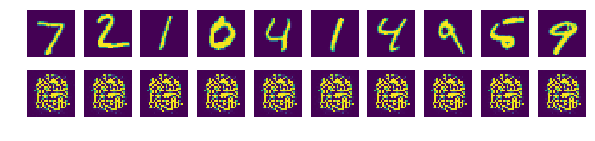

Epoch: 0001 D loss: 0.03188 G loss: 5.869
Epoch: 0002 D loss: 0.01393 G loss: 6.665
Epoch: 0003 D loss: 0.01183 G loss: 6.975
Epoch: 0004 D loss: 0.0283 G loss: 6.823
Epoch: 0005 D loss: 0.03115 G loss: 10.33
Epoch: 0006 D loss: 0.1149 G loss: 6.427
Epoch: 0007 D loss: 0.04568 G loss: 8.099
Epoch: 0008 D loss: 0.04952 G loss: 6.469
Epoch: 0009 D loss: 0.2283 G loss: 4.976


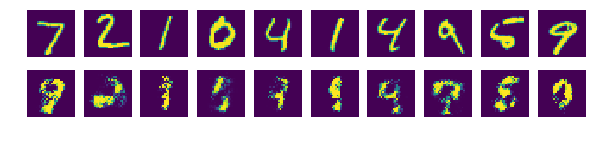

Epoch: 0010 D loss: 0.1104 G loss: 6.176
Epoch: 0011 D loss: 0.2212 G loss: 4.295
Epoch: 0012 D loss: 0.2221 G loss: 4.794
Epoch: 0013 D loss: 0.4479 G loss: 4.014
Epoch: 0014 D loss: 0.2909 G loss: 4.644
Epoch: 0015 D loss: 0.4422 G loss: 3.51
Epoch: 0016 D loss: 0.4928 G loss: 3.95
Epoch: 0017 D loss: 0.6554 G loss: 3.633
Epoch: 0018 D loss: 0.5921 G loss: 3.293
Epoch: 0019 D loss: 0.6714 G loss: 3.164


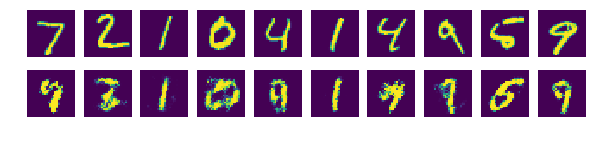

Epoch: 0020 D loss: 0.7383 G loss: 2.818
Epoch: 0021 D loss: 0.809 G loss: 2.546
Epoch: 0022 D loss: 0.5245 G loss: 2.979
Epoch: 0023 D loss: 0.5361 G loss: 2.997
Epoch: 0024 D loss: 0.7566 G loss: 2.833
Epoch: 0025 D loss: 0.5008 G loss: 3.105
Epoch: 0026 D loss: 0.6246 G loss: 2.848
Epoch: 0027 D loss: 0.8032 G loss: 2.191
Epoch: 0028 D loss: 0.7182 G loss: 2.328
Epoch: 0029 D loss: 0.652 G loss: 2.546


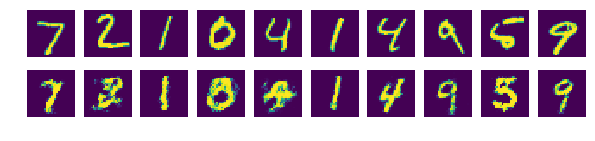

Epoch: 0030 D loss: 1.042 G loss: 2.028
Epoch: 0031 D loss: 0.8199 G loss: 1.795
Epoch: 0032 D loss: 0.9542 G loss: 1.935
Epoch: 0033 D loss: 0.5903 G loss: 2.354
Epoch: 0034 D loss: 0.7416 G loss: 2.36
Epoch: 0035 D loss: 0.8894 G loss: 2.223
Epoch: 0036 D loss: 0.9815 G loss: 1.885
Epoch: 0037 D loss: 0.7617 G loss: 2.548
Epoch: 0038 D loss: 0.8131 G loss: 1.742
Epoch: 0039 D loss: 0.6846 G loss: 2.22


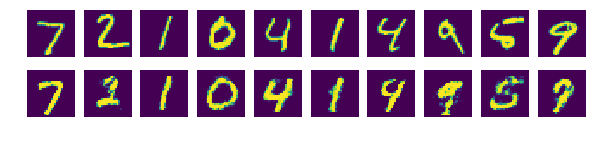

Epoch: 0040 D loss: 0.7028 G loss: 1.863
Epoch: 0041 D loss: 0.9485 G loss: 2.311
Epoch: 0042 D loss: 0.8867 G loss: 1.986
Epoch: 0043 D loss: 0.7032 G loss: 2.195
Epoch: 0044 D loss: 0.8802 G loss: 1.835
Epoch: 0045 D loss: 0.9584 G loss: 2.15
Epoch: 0046 D loss: 0.9237 G loss: 1.831
Epoch: 0047 D loss: 0.6308 G loss: 2.136
Epoch: 0048 D loss: 0.7764 G loss: 2.079
Epoch: 0049 D loss: 0.8372 G loss: 1.988


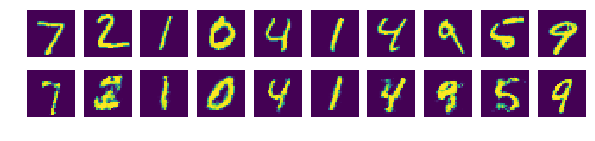

Epoch: 0050 D loss: 0.8817 G loss: 1.773
Epoch: 0051 D loss: 0.7053 G loss: 2.057
Epoch: 0052 D loss: 0.8474 G loss: 2.139
Epoch: 0053 D loss: 0.7988 G loss: 1.985
Epoch: 0054 D loss: 0.7856 G loss: 2.019
Epoch: 0055 D loss: 0.8566 G loss: 1.818
Epoch: 0056 D loss: 0.6384 G loss: 2.099
Epoch: 0057 D loss: 0.8717 G loss: 1.79
Epoch: 0058 D loss: 0.733 G loss: 2.201
Epoch: 0059 D loss: 0.8153 G loss: 2.106


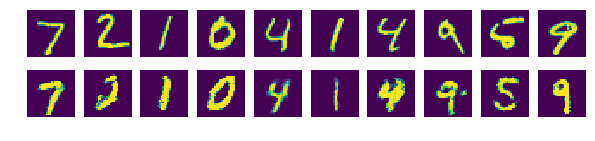

Epoch: 0060 D loss: 0.8216 G loss: 1.934
Epoch: 0061 D loss: 0.8421 G loss: 1.863
Epoch: 0062 D loss: 0.8461 G loss: 1.833
Epoch: 0063 D loss: 0.7152 G loss: 2.181
Epoch: 0064 D loss: 0.8685 G loss: 1.704
Epoch: 0065 D loss: 0.7423 G loss: 1.787
Epoch: 0066 D loss: 0.6915 G loss: 2.472
Epoch: 0067 D loss: 0.7381 G loss: 2.047
Epoch: 0068 D loss: 0.77 G loss: 2.021
Epoch: 0069 D loss: 0.7894 G loss: 1.671


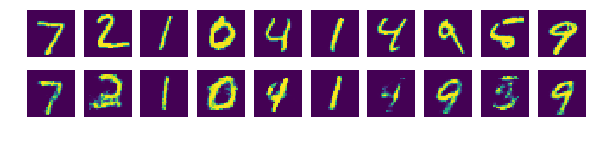

Epoch: 0070 D loss: 0.6717 G loss: 2.092
Epoch: 0071 D loss: 0.821 G loss: 2.038
Epoch: 0072 D loss: 0.7241 G loss: 1.711
Epoch: 0073 D loss: 0.7698 G loss: 1.952
Epoch: 0074 D loss: 0.6913 G loss: 1.83
Epoch: 0075 D loss: 0.5995 G loss: 2.312
Epoch: 0076 D loss: 0.6938 G loss: 2.048
Epoch: 0077 D loss: 0.8427 G loss: 1.927
Epoch: 0078 D loss: 0.7845 G loss: 1.779
Epoch: 0079 D loss: 0.7915 G loss: 1.915


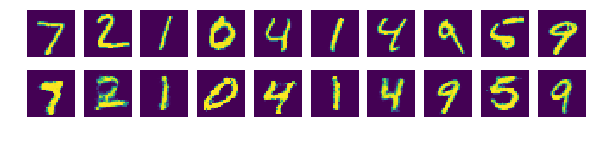

Epoch: 0080 D loss: 0.7673 G loss: 1.924
Epoch: 0081 D loss: 0.7144 G loss: 1.948
Epoch: 0082 D loss: 0.8612 G loss: 1.641
Epoch: 0083 D loss: 0.8912 G loss: 1.929
Epoch: 0084 D loss: 0.7203 G loss: 2.295
Epoch: 0085 D loss: 0.756 G loss: 1.899
Epoch: 0086 D loss: 0.7415 G loss: 2.064
Epoch: 0087 D loss: 0.8068 G loss: 1.926
Epoch: 0088 D loss: 0.73 G loss: 2.248
Epoch: 0089 D loss: 0.7291 G loss: 2.129


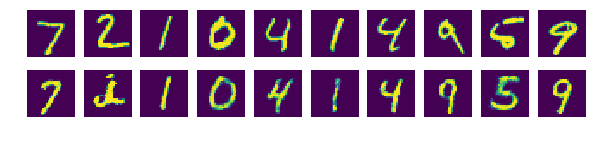

Epoch: 0090 D loss: 0.8626 G loss: 1.775
Epoch: 0091 D loss: 0.7408 G loss: 1.711
Epoch: 0092 D loss: 0.7182 G loss: 1.904
Epoch: 0093 D loss: 0.8208 G loss: 2.218
Epoch: 0094 D loss: 0.7763 G loss: 2.116
Epoch: 0095 D loss: 0.8093 G loss: 1.827
Epoch: 0096 D loss: 0.8903 G loss: 2.068
Epoch: 0097 D loss: 0.7843 G loss: 1.822
Epoch: 0098 D loss: 0.8232 G loss: 1.59
Epoch: 0099 D loss: 0.8792 G loss: 1.741


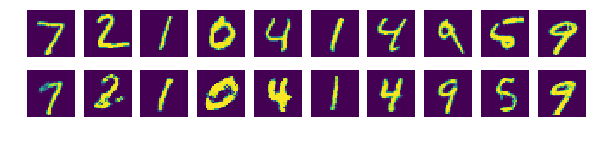

최적화 완료!


In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)

        _, loss_val_D = sess.run([train_D, loss_D],
                                 feed_dict={X: batch_xs, Y: batch_ys, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G],
                                 feed_dict={Y: batch_ys, Z: noise})

    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G))

    #########
    # 학습이 되어가는 모습을 보기 위해 주기적으로 레이블에 따른 이미지를 생성하여 저장
    ######
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G,
                           feed_dict={Y: mnist.test.labels[:sample_size],
                                      Z: noise})

        fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

        for i in range(sample_size):
            ax[0][i].set_axis_off()
            ax[1][i].set_axis_off()

            ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
            ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

        plt.savefig('./{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        plt.show(fig)
        plt.close(fig)

print('최적화 완료!')